In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("Dhaka Rent - Dhaka Rent.csv")
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [4]:
df.shape

(60, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [6]:
df.isnull().sum()

area    0
rent    0
dtype: int64

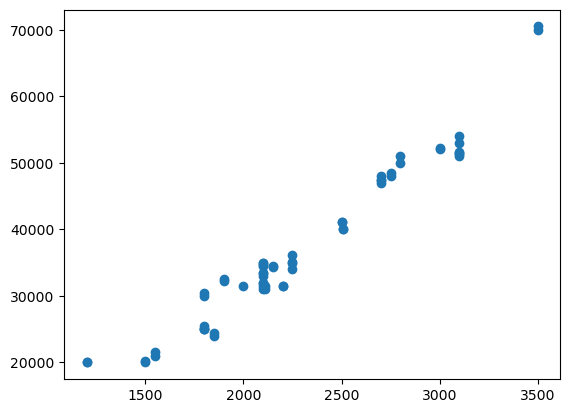

In [7]:
plt.scatter(df['area'], df['rent'])

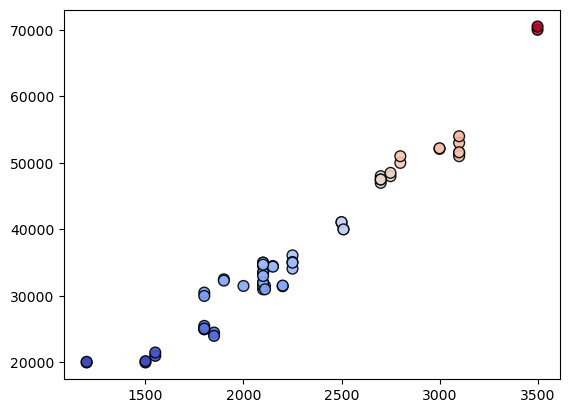

In [8]:
plt.scatter(df['area'],
            df['rent'],
            c=df['rent'],
            cmap='coolwarm',
            s=60,
            alpha=.90,
            edgecolor='k')

Text(0.5, 1.0, 'area vs rent')

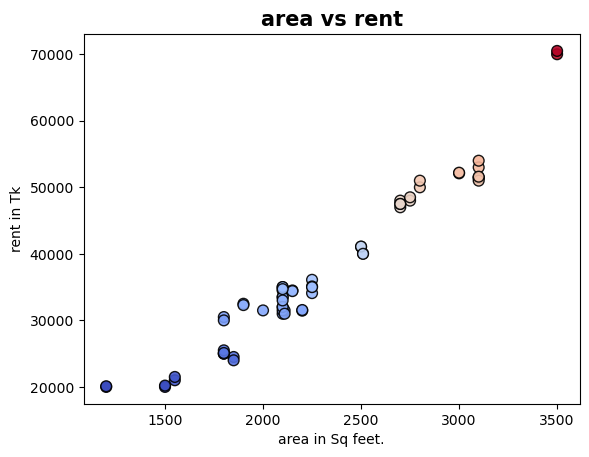

In [9]:
plt.scatter(df['area'],
            df['rent'],
            c=df['rent'],
            cmap='coolwarm',
            s=60,
            alpha=.90,
            edgecolor='k')
plt.xlabel('area in Sq feet.', fontsize=10)
plt.ylabel('rent in Tk', fontsize=10)
plt.title('area vs rent', fontsize=15, weight='bold')

In [10]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


In [11]:
x = df['area']
y = df['rent']
dev_x = x - np.mean(x)
dev_y = y - np.mean(y)


In [12]:
m = np.sum(dev_x * dev_y)/ np.sum(dev_x**2)
m

np.float64(21.292661473611954)

In [13]:
c = np.mean(y) - (m*np.mean(x))
c

np.float64(-11469.7354464311)

In [14]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [15]:
m*2100 + c

np.float64(33244.85364815401)

In [16]:
m*3000 + c

np.float64(52408.24897440476)

In [17]:
reg = LinearRegression()

In [18]:
reg.fit(df[["area"]],y)

LinearRegression()

In [19]:
reg.coef_

array([21.29266147])

In [20]:
reg.intercept_

np.float64(-11469.735446431114)

In [21]:
reg.predict([[2250]])

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36438.7528692])

In [22]:
reg.predict(df[["area"]])

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [23]:
df2 = df.copy()

In [24]:
df2['Predicted'] = reg.predict(df[['area']])
df2.tail()

,area,rent,Predicted
55,3100,54000,54537.515122
56,2750,48500,47085.083606
57,1800,25100,26857.055206
58,2200,31560,35374.119796
59,3100,51600,54537.515122


In [25]:
reg.score(df[['area']], df[['rent']])

0.950249380357677

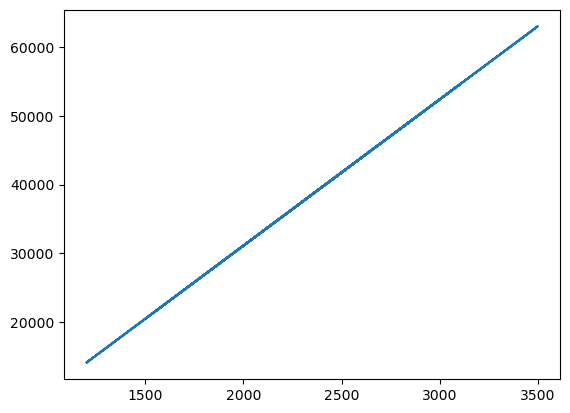

In [26]:
plt.plot(df[['area']], reg.predict(df[['area']]))            

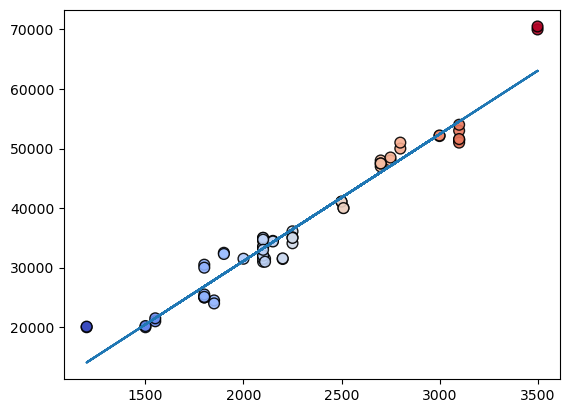

In [27]:
plt.plot(df[['area']], reg.predict(df[['area']]))
plt.scatter (df['area'],
             df['rent'],
             c=df['area'],
             cmap='coolwarm',
             s=60,
             alpha=.90,
             edgecolor='k')

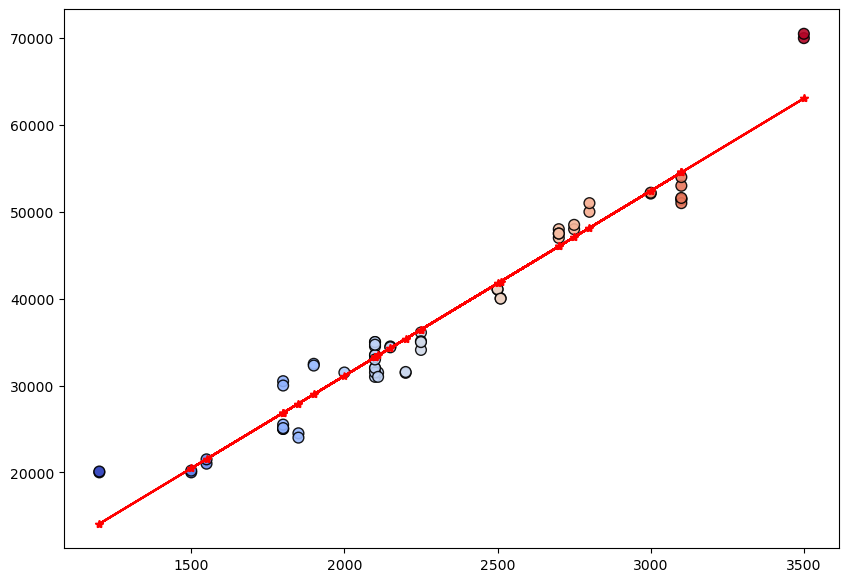

In [28]:
plt.figure(figsize=(10,7))
plt.plot(df[['area']], reg.predict(df[['area']]), color='red', marker='*')
plt.scatter (df['area'],
             df['rent'],
             c=df['area'],
             cmap='coolwarm',
             s=60,
             alpha=.90,
             edgecolor='k')

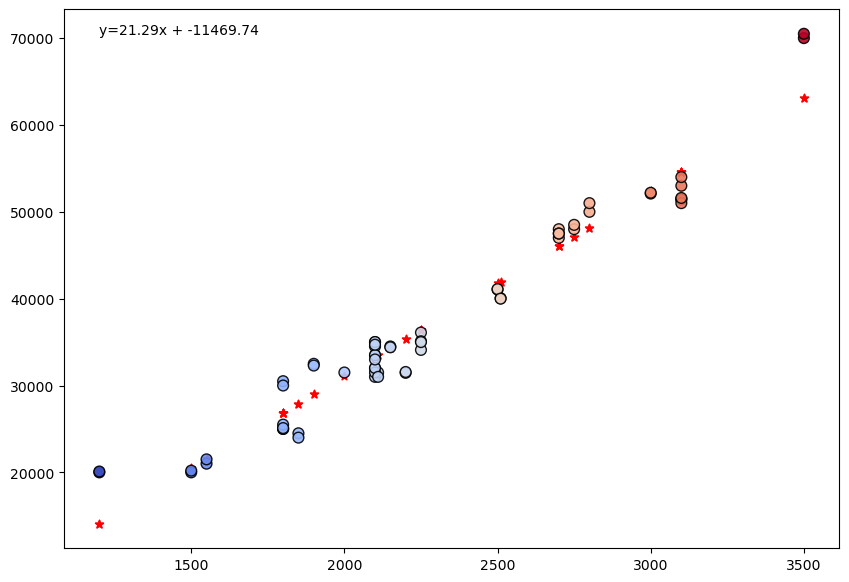

In [39]:
plt.figure(figsize=(10,7))
m = reg.coef_[0]
c = reg.intercept_
equ = f"y={float(m):.2f}x + {float(c):.2f}"
plt.text(min(df['area']), max(df['rent'])-30, equ)
plt.scatter(df[['area']], reg.predict(df[['area']]), color='red', marker='*', label='Predicted')
plt.scatter (df['area'],
             df['rent'],
             c=df['area'],
             cmap='coolwarm',
             s=60,
             alpha=.90,
             edgecolor='k',
             label='Original')




In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(df2[['rent']], df2['Predicted'])

6778077.204095561

In [41]:
mean_absolute_error(df2[['rent']], df2['Predicted'])

2009.8695093576282